In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
url = 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.shape

(1453, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

There are no null values in the dataset.

In [8]:
df.duplicated().sum()

22

In [9]:
# Remove duplicates
df = df.drop_duplicates()

##### Now we convert the categorical values into numerical values for analysis.

In [10]:
df1 = df.copy()

In [11]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [12]:
# Define the binary mapping for specific columns
binary_map = {'Yes': 1, 'No': 0}

# Iterate over a list of column names and apply the mapping using the map() function
columns_to_map = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
for column in columns_to_map:
    df1[column] = df1[column].map(binary_map)


In [13]:
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [14]:
# Define the mapping from text ratings to numerical ratings
rating_map = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Use the replace() function to apply the mapping and convert to integer data type
df1['Like'] = df1['Like'].replace(rating_map).astype(int)

In [15]:
df1['Like'].value_counts()

 3    225
 2    180
 0    168
 4    156
 1    152
-5    150
 5    140
-3     73
-4     70
-2     59
-1     58
Name: Like, dtype: int64

Now the ratings have been converted from -5 to 5.

In [16]:
df1['Like'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1431 entries, 0 to 1452
Series name: Like
Non-Null Count  Dtype
--------------  -----
1431 non-null   int32
dtypes: int32(1)
memory usage: 16.8 KB


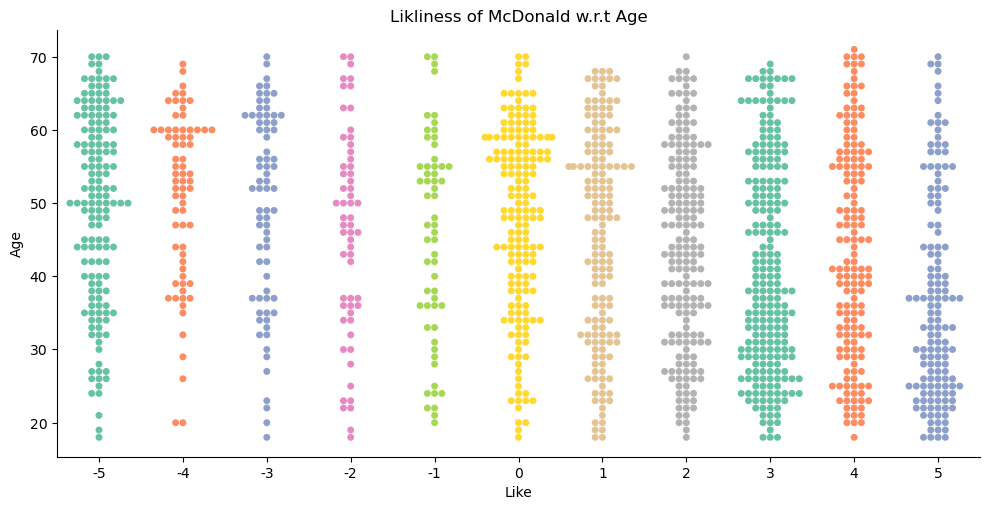

In [43]:
#Like 
sns.catplot(x="Like", y="Age",data=df1, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likliness of McDonald w.r.t Age')
plt.show()

In [17]:
df1['VisitFrequency'].value_counts()

Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

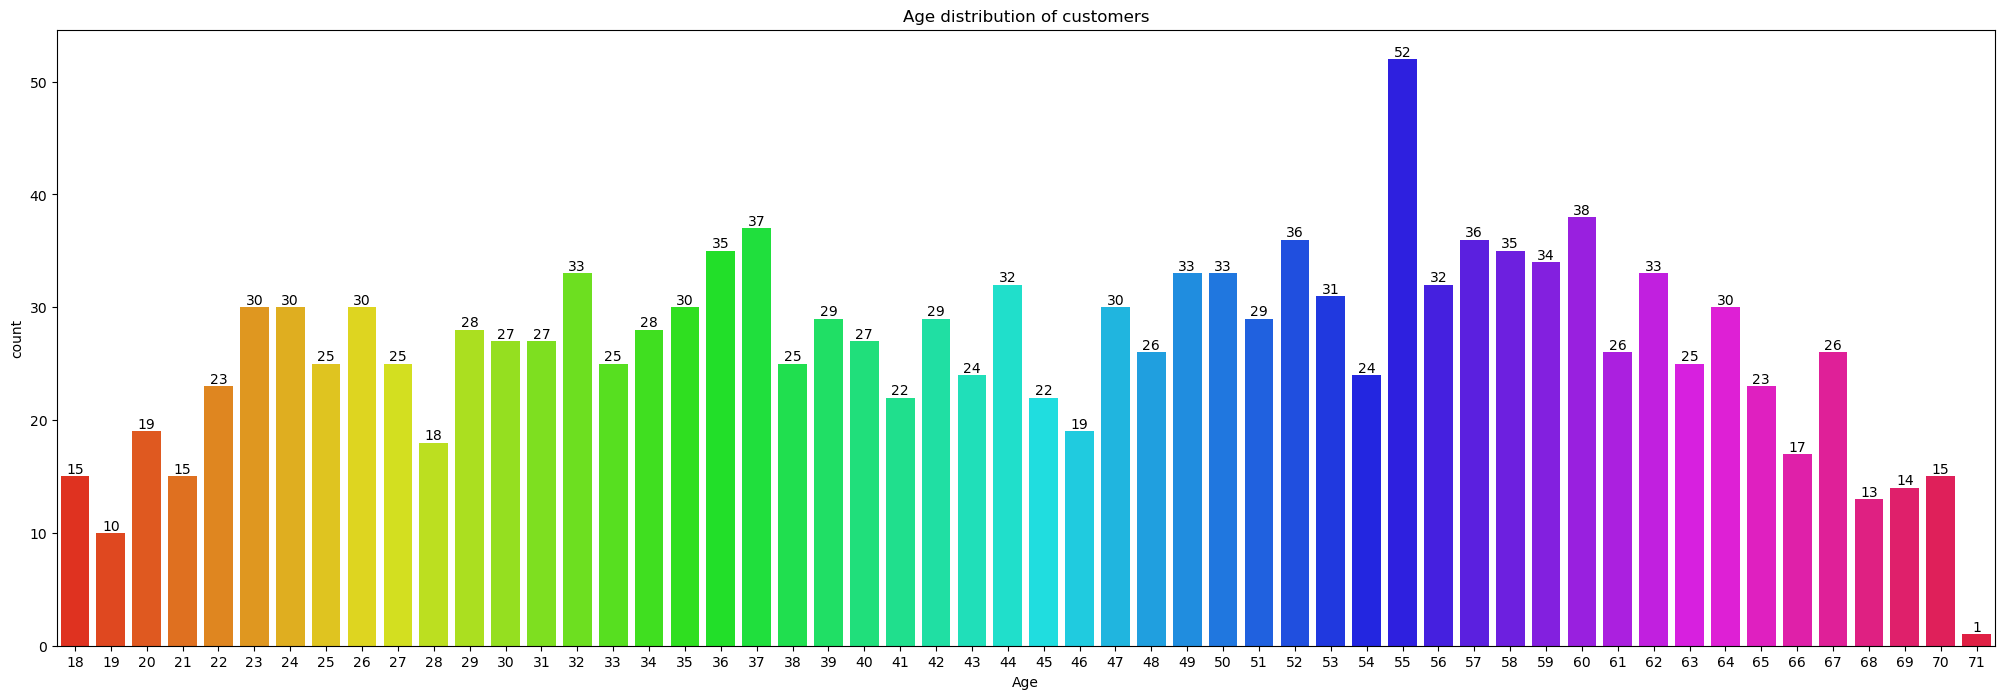

In [41]:
#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

In [18]:
df['Gender'].value_counts()

Female    772
Male      659
Name: Gender, dtype: int64

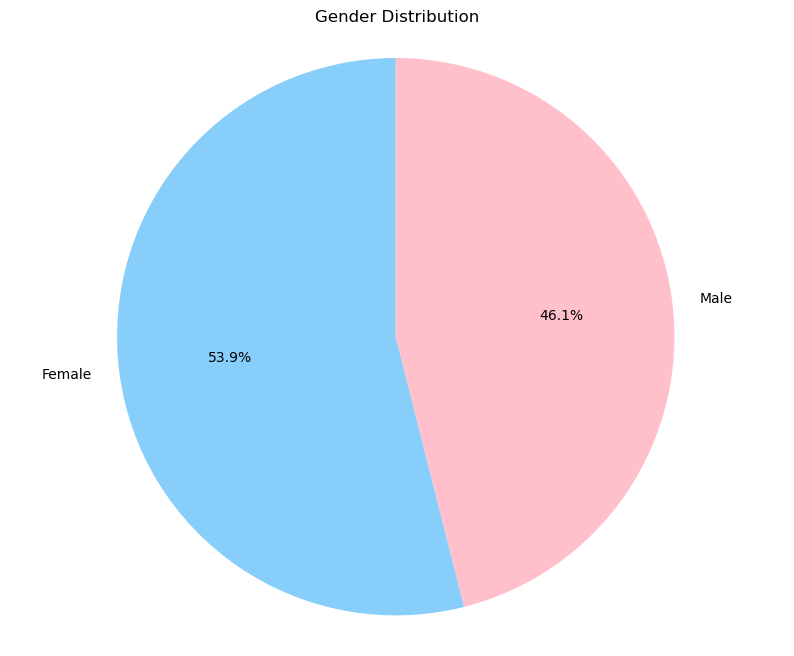

In [35]:
# create a pie chart of gender distribution
gender_counts = df['Gender'].value_counts()
labels = ['Female', 'Male']
colors = ['lightskyblue', 'pink']
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()


In [20]:
gender_map = {'Male': 0, 'Female': 1}
df1['Gender'] = df1['Gender'].map(gender_map)

In [21]:
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,0
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,1
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,0


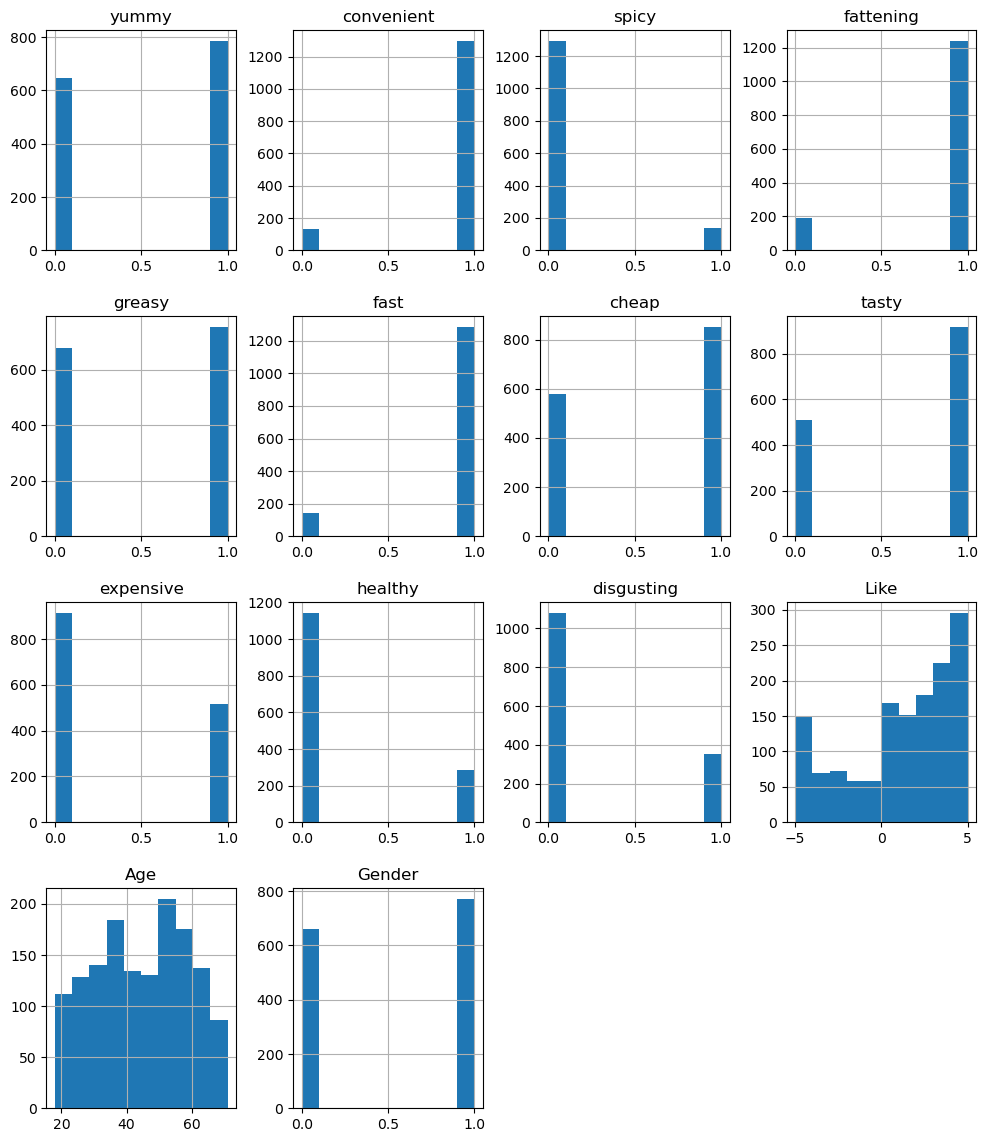

In [44]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df1.hist()
plt.show()

In [22]:
df1.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
yummy,1.000000,0.251783,0.011014,-0.087096,-0.149501,0.105388,0.105946,0.683329,-0.062656,0.250295,-0.415754,0.680476,-0.276723,0.064713
convenient,0.251783,1.000000,0.029874,0.037141,-0.105675,0.243447,0.152927,0.288270,-0.165618,0.100224,-0.338588,0.364578,-0.067099,0.042257
spicy,0.011014,0.029874,1.000000,-0.040972,0.054126,0.021957,0.019552,0.062931,0.044465,0.105473,0.031801,-0.007810,0.146512,-0.049573
fattening,-0.087096,0.037141,-0.040972,1.000000,0.319529,0.045258,-0.026295,-0.087183,0.089319,-0.331984,0.146833,-0.160301,-0.136318,0.062007
greasy,-0.149501,-0.105675,0.054126,0.319529,1.000000,-0.058437,-0.076774,-0.161251,0.151917,-0.210503,0.321009,-0.255723,-0.230812,-0.021819
fast,0.105388,0.243447,0.021957,0.045258,-0.058437,1.000000,0.251627,0.145512,-0.201183,0.035169,-0.137572,0.168018,-0.019554,0.047506
cheap,0.105946,0.152927,0.019552,-0.026295,-0.076774,0.251627,1.000000,0.142091,-0.718217,0.132001,-0.127146,0.146426,0.017948,0.112432
tasty,0.683329,0.288270,0.062931,-0.087183,-0.161251,0.145512,0.142091,1.000000,-0.107414,0.228226,-0.433350,0.642260,-0.188466,0.047426
expensive,-0.062656,-0.165618,0.044465,0.089319,0.151917,-0.201183,-0.718217,-0.107414,1.000000,-0.070832,0.202451,-0.139950,-0.072344,-0.141240
healthy,0.250295,0.100224,0.105473,-0.331984,-0.210503,0.035169,0.132001,0.228226,-0.070832,1.000000,-0.175380,0.283553,0.016804,0.042606


<AxesSubplot:>

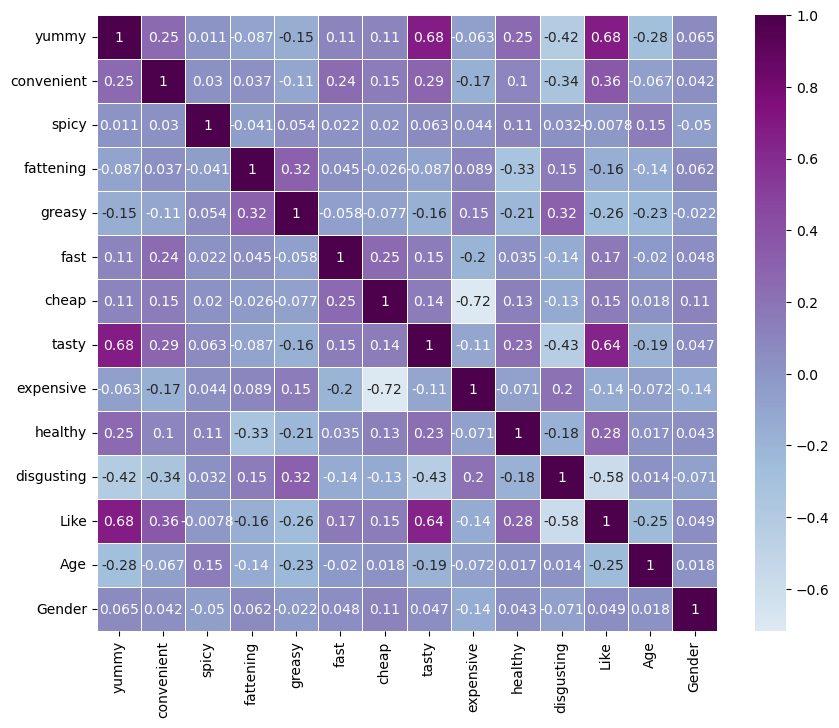

In [23]:
#create a heatmap for the numerical variables.
plt.rcParams['figure.figsize']=(10,8)
corr=df1.corr()
sns.heatmap(data=corr,annot=True,cmap='BuPu',linewidths=.5,center=0)

In [24]:
df1.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,0.549266,0.907058,0.095038,0.866527,0.526904,0.898672,0.595388,0.642208,0.360587,0.200559,0.244584,0.758910,44.656184,0.539483
std,0.497741,0.290453,0.293371,0.340204,0.499450,0.301868,0.490988,0.479518,0.480339,0.400559,0.429991,3.116595,14.199400,0.498613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,1.000000


The mean values suggests what the customers say about the taste of McD.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1431 non-null   int64 
 1   convenient      1431 non-null   int64 
 2   spicy           1431 non-null   int64 
 3   fattening       1431 non-null   int64 
 4   greasy          1431 non-null   int64 
 5   fast            1431 non-null   int64 
 6   cheap           1431 non-null   int64 
 7   tasty           1431 non-null   int64 
 8   expensive       1431 non-null   int64 
 9   healthy         1431 non-null   int64 
 10  disgusting      1431 non-null   int64 
 11  Like            1431 non-null   int32 
 12  Age             1431 non-null   int64 
 13  VisitFrequency  1431 non-null   object
 14  Gender          1431 non-null   int64 
dtypes: int32(1), int64(13), object(1)
memory usage: 173.3+ KB


##### PCA

To perform Principal Component Analysis (PCA) on your dataset, you first need to ensure that your data is scaled and centered around zero, as PCA is sensitive to the scale of the input features.

In [59]:
df_eleven = df1.iloc[:, :11]

In [50]:
#Considering only the 11 cols and converting it into array
x = df1.iloc[:, :11].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [51]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.419114,-0.231691,0.660553,-0.394399,0.200925,-0.391549,-0.213729,0.167607,0.179510,0.531101,-0.554209
1,-0.220189,0.393341,-0.729516,-0.102505,0.043964,-0.085099,-0.095786,-0.034779,0.110699,0.507822,-0.487602
2,0.371455,0.728362,-0.124168,0.683734,0.849209,-0.677356,0.581753,0.364017,-0.327911,0.050151,0.243132
3,-0.179665,-0.345683,-0.851313,0.204693,-0.680349,-0.036688,-0.056524,-0.232855,-0.024518,-0.247991,-0.056664
4,0.173971,-0.808123,0.016911,0.545781,0.860236,-0.083213,-0.456052,0.164836,-0.073457,0.027998,0.081264
...,...,...,...,...,...,...,...,...,...,...,...
1426,1.547013,0.263928,-0.014192,0.201105,-0.146572,0.309209,-0.076867,0.344021,-0.136215,-0.419146,-0.464879
1427,-0.963333,0.018977,0.298754,0.445180,-0.134964,0.391248,-0.330860,0.870713,-0.305065,-0.240094,-0.197849
1428,-0.182781,1.057798,0.229392,-0.470739,-0.191532,-0.199227,-0.093868,-0.033670,0.039346,0.057964,-0.012160
1429,-1.188787,-0.033521,0.555086,0.696727,0.047700,0.195972,-0.024075,-0.345070,0.023337,-0.000024,-0.107268


In [52]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29899056, 0.19156392, 0.13267983, 0.08290307, 0.05969759,
       0.05069322, 0.04429957, 0.03985029, 0.03715547, 0.03260161,
       0.02956487])

In [53]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29899056, 0.49055448, 0.62323431, 0.70613738, 0.76583497,
       0.81652819, 0.86082776, 0.90067805, 0.93783352, 0.97043513,
       1.        ])

In [60]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.473652,0.370610,-0.301355,0.053818,-0.307839,0.170267,-0.278457,0.012604,0.574230,-0.107604,0.042649
convenient,-0.155302,0.016830,-0.062892,-0.144547,0.276766,-0.343663,-0.060092,-0.108304,-0.015511,-0.652477,-0.561015
spicy,-0.007448,0.019080,-0.039472,0.199271,0.073973,-0.353279,0.707035,0.381458,0.395773,-0.079203,0.140418
fattening,0.116058,-0.034366,-0.322261,-0.349149,-0.069891,-0.403426,-0.392024,0.590763,-0.160342,-0.011932,0.251830
greasy,0.303698,-0.057601,-0.802992,0.245048,0.362733,0.215346,0.038995,-0.141622,-0.002631,0.008337,0.001655
fast,-0.109396,-0.086865,-0.065928,-0.097602,0.112772,-0.598702,-0.085239,-0.625020,0.168059,0.228139,0.342411
cheap,-0.341107,-0.606855,-0.155916,0.123186,-0.127236,-0.101218,-0.040913,0.140513,0.073985,0.441522,-0.477097
tasty,-0.469349,0.312024,-0.285723,-0.006973,-0.211855,-0.079163,0.357405,-0.073368,-0.640410,0.075988,0.022303
expensive,0.333174,0.598525,0.028200,0.068841,-0.000381,-0.262920,-0.067548,0.031604,0.064168,0.466890,-0.477950


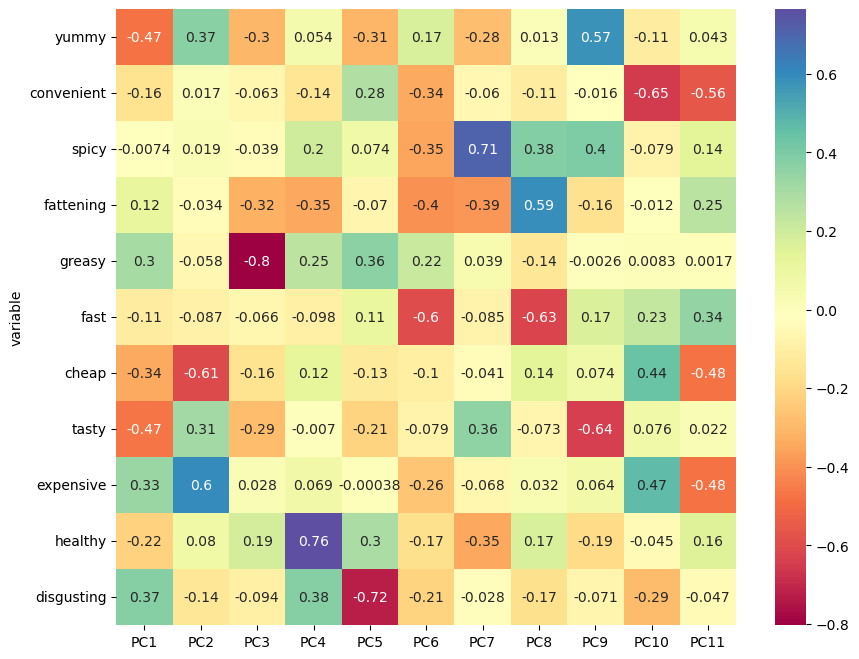

In [61]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (10,8)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

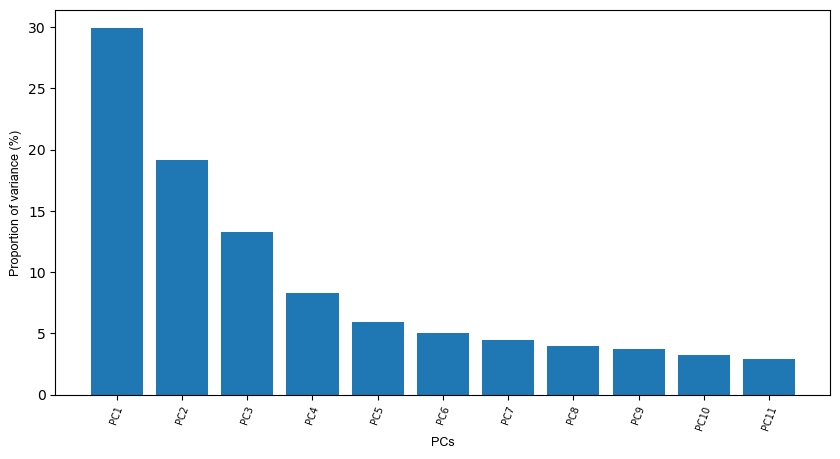

In [63]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

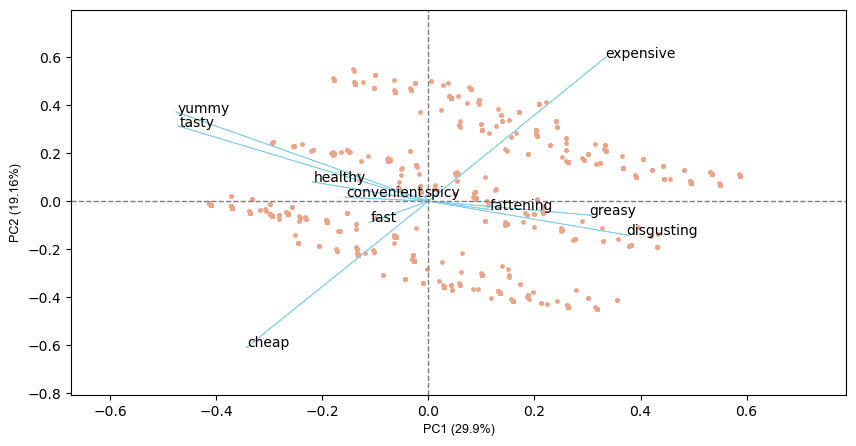

In [64]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


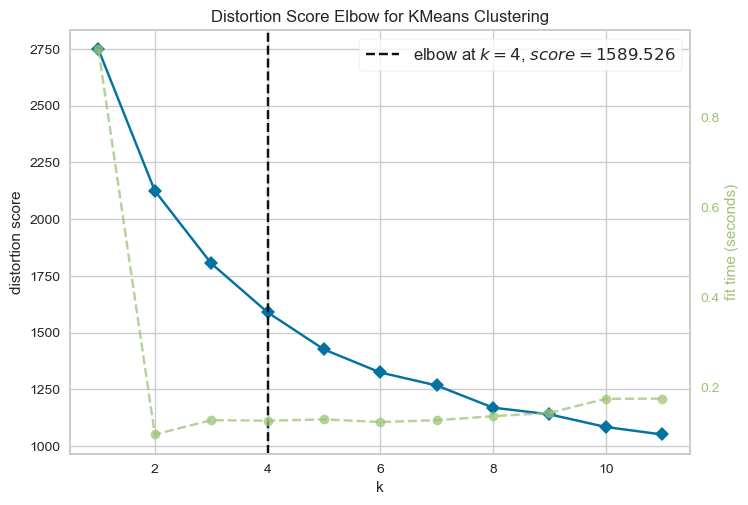

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

This is to determine the optimal number of clusters to use for the given dataset (`df_eleven` in this case)

In [72]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df1['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 3 3 ... 3 1 0]
1589.6104840121302
7
[[0.0210084  0.67226891 0.07142857 0.91176471 0.70168067 0.73529412
  0.05462185 0.07142857 0.89495798 0.06302521 0.71848739]
 [0.96538462 0.98076923 0.08653846 0.77692308 0.34615385 0.95769231
  0.92115385 0.97307692 0.01923077 0.34423077 0.04807692]
 [0.01933702 0.90883978 0.08563536 0.93093923 0.59668508 0.9558011
  0.90055249 0.29558011 0.02209945 0.07458564 0.33149171]
 [0.87459807 0.96141479 0.13826367 0.90675241 0.61414791 0.8585209
  0.10932476 0.92926045 0.91639871 0.21221865 0.10932476]]


In [73]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 362, 3: 311, 1: 520, 0: 238})

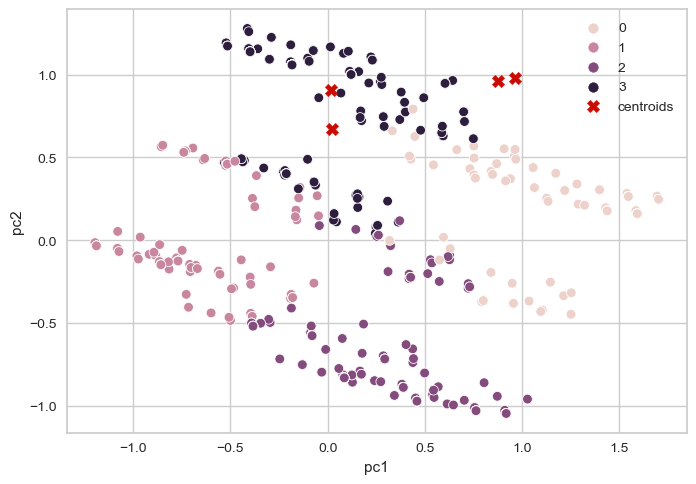

In [74]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [81]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df1['cluster_num'],df1['Like'])

In [82]:
crosstab

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,87,28,30,18,12,35,14,6,8,0,0
1,2,3,1,6,10,34,51,76,135,106,96
2,56,37,35,29,30,66,46,43,17,3,0
3,5,2,7,6,6,33,41,55,65,47,44


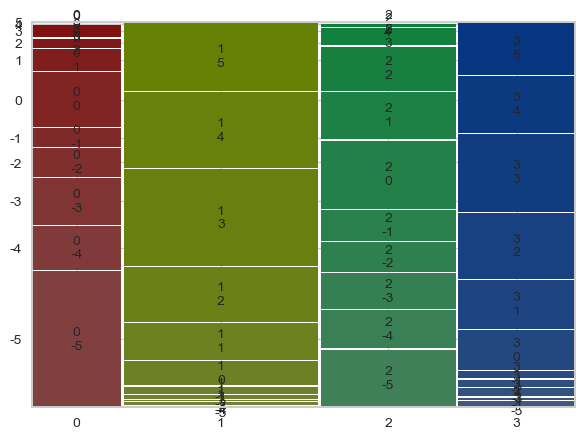

In [85]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [88]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,102,136
1,315,205
2,208,154
3,147,164


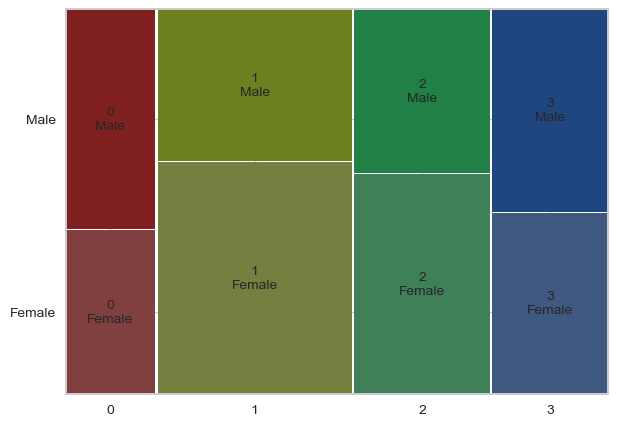

In [89]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

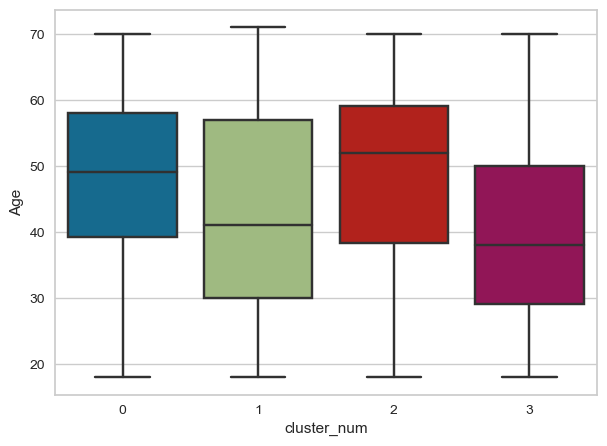

In [90]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df1)

In [92]:
#Calculating the mean
#Visit frequency
from sklearn.preprocessing import LabelEncoder
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.697479
1,1,2.596154
2,2,2.732044
3,3,2.562701


In [93]:
#Like
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,2.331933
1,1,7.817308
2,2,3.823204
3,3,7.192926


In [94]:
#Gender
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender


,cluster_num,Gender
0,0,0.428571
1,1,0.605769
2,2,0.574586
3,3,0.472669


In [95]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.428571,2.331933,2.697479
1,1,0.605769,7.817308,2.596154
2,2,0.574586,3.823204,2.732044
3,3,0.472669,7.192926,2.562701


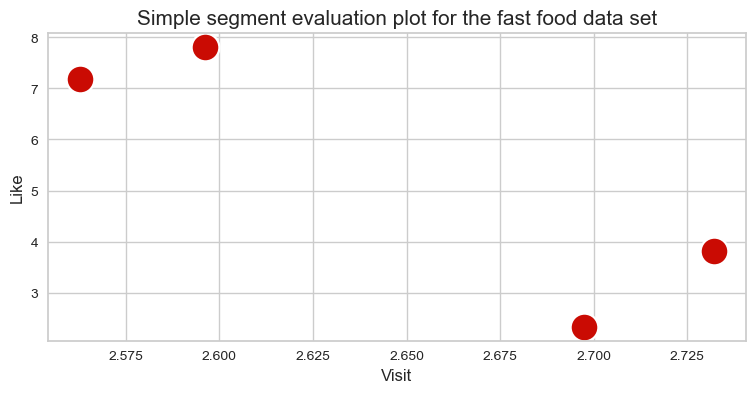

In [96]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()